In [27]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [6]:
# Load input image and predicted mask
mask_PATH = r"D:\Uni\SS23\Praktikum\Hair_Segmentation_Recoloring\simple_UNet\test_output.png"
input_PATH = r"D:\Uni\SS23\Praktikum\Hair_Segmentation_Recoloring\simple_UNet\test_input.png"

In [24]:
mask = cv2.imread(mask_PATH)
input_img = cv2.imread(input_PATH)

In [45]:
print(mask[:,:,0].shape)

(288, 432)


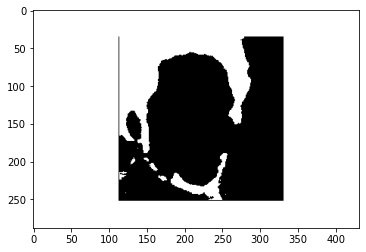

In [47]:
plt.imshow(mask[:,:,0], cmap='gray')

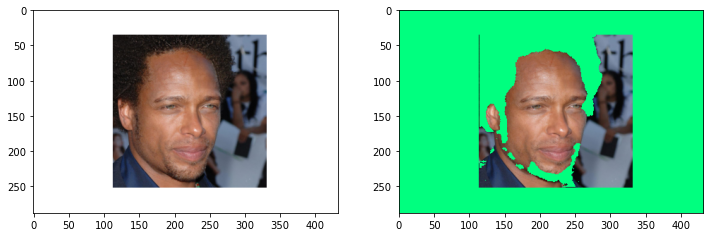

In [64]:
color = [127,255,0] # set the color you want
_, mask = cv2.threshold(mask, thresh=180, maxval=255, type=cv2.THRESH_BINARY)
# copy where we'll assign the new values
green_hair = np.copy(input_img)
# boolean indexing and assignment based on mask
green_hair[(mask==255).all(-1)] = color

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(green_hair, cv2.COLOR_BGR2RGB))

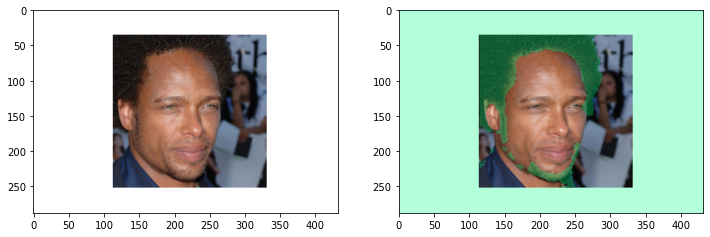

In [65]:
alpha = 0.7
green_hair_w = cv2.addWeighted(green_hair, 1-alpha, input_img, alpha, 0, green_hair)

fig, ax = plt.subplots(1,2,figsize=(12,6))
ax[0].imshow(cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(green_hair_w, cv2.COLOR_BGR2RGB))

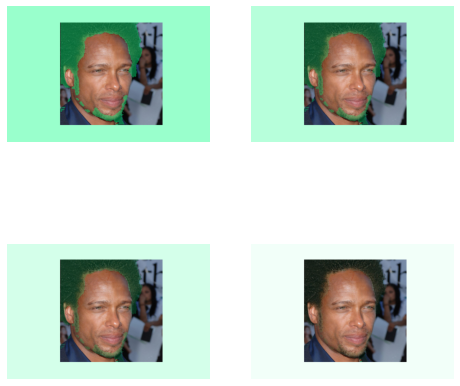

In [66]:
green_hair = np.copy(input_img)
# boolean indexing and assignment based on mask
green_hair[(mask==255).all(-1)] = color
fig, axes = plt.subplots(2,2,figsize=(8,8))
for ax, alpha in zip(axes.flatten(), np.linspace(.6, .95, 4)):
    green_hair_w = cv2.addWeighted(green_hair, 1-alpha, input_img, alpha, 0, green_hair_w)
    ax.imshow(cv2.cvtColor(green_hair_w, cv2.COLOR_BGR2RGB))
    ax.axis('off')

### Another approach

In [56]:
a = np.where(mask[:,:,0]/255 > 0)
ones = np.ones_like(input_img)
ones[a] = [0.5,1,1]
r = input_img*ones

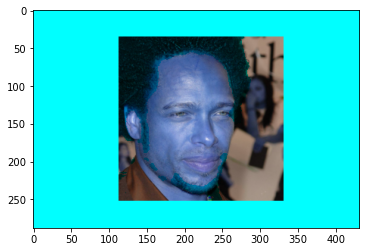

In [57]:
plt.imshow(r)